In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  
from sklearn.cluster import DBSCAN

In [2]:
#loading dataset
df = pd.read_csv('C:/Users/ch likitha/Desktop/mldm/Country-data.csv')
  
print(df.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [8]:
#correlatin matrix
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustdbscan
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032,-0.429502
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725,0.212653
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966,-0.139380
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498,-0.064389
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571,0.366334
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631,-0.132349
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089,0.410800
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910,-0.402068
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000,0.302911
clustdbscan,-0.429502,0.212653,-0.139380,-0.064389,0.366334,-0.132349,0.410800,-0.402068,0.302911,1.000000


In [11]:
#cov_matrix
cov_matrix=df.cov()
cov_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustdbscan
child_mort,1626.422713,-351.651128,-22.199943,-124.201982,-4.076360e+05,122.893627,-318.008262,51.801162,-3.570463e+05,-12.227267
exports,-351.651128,751.418298,-8.614534,489.350622,2.730946e+05,-31.090078,77.110598,-13.279671,2.103785e+05,4.114913
health,-22.199943,-8.614534,7.545116,6.365141,6.861669e+03,-7.415093,5.146808,-0.817828,1.741797e+04,-0.270259
imports,-124.201982,489.350622,6.365141,586.104198,5.712872e+04,-63.208898,11.710284,-5.829066,5.125005e+04,-1.100392
income,-407635.982270,273094.598023,6861.669071,57128.721588,3.716439e+08,-30110.122438,104916.785517,-14645.727927,3.164430e+08,4985.259072
inflation,122.893627,-31.090078,-7.415093,-63.208898,-3.011012e+04,111.739781,-22.533965,5.071509,-4.294042e+04,-0.987580
life_expec,-318.008262,77.110598,5.146808,11.710284,1.049168e+05,-22.533965,79.088507,-10.243585,9.781472e+04,2.578898
total_fer,51.801162,-13.279671,-0.817828,-5.829066,-1.464573e+04,5.071509,-10.243585,2.291734,-1.262233e+04,-0.429664
gdpp,-357046.306154,210378.470377,17417.971217,51250.050217,3.164430e+08,-42940.421636,97814.722603,-12622.333657,3.359414e+08,3919.177693
clustdbscan,-12.227267,4.114913,-0.270259,-1.100392,4.985259e+03,-0.987580,2.578898,-0.429664,3.919178e+03,0.498305


In [20]:
#eigen values and eigen vector
eigen_values,eigen_vector=np.linalg.eig(cov_matrix)
print('e-value',eigen_values)
print('e-vector',eigen_vector)

e-value [6.70739440e+08 3.68465803e+07 1.25100922e+03 9.81359798e+02
 1.35158016e+02 7.35107140e+01 1.28828468e+01 4.25236605e+00
 6.16898501e-01 3.41482680e-01]
e-vector [[ 8.07327698e-04 -5.57055029e-04  9.25224164e-01  3.28709794e-01
  -3.94142271e-02  6.09257729e-02  1.72212456e-01 -1.09640122e-02
   2.92902018e-02  2.91025354e-03]
 [-5.11348092e-04  9.41707964e-04 -2.28589327e-01  6.52824058e-01
   5.95037504e-01  4.01791348e-01 -2.81479300e-02 -7.23427569e-02
  -1.64248289e-03 -5.66775218e-03]
 [-2.52724061e-05 -2.15627987e-04 -9.25719786e-03 -7.58430991e-03
  -7.77734076e-02 -5.54561000e-02  3.92491641e-03 -9.93177773e-01
  -1.30169330e-02  6.43872595e-02]
 [-1.14384869e-04  5.41883706e-05 -2.42654887e-01  6.78175784e-01
  -5.29215493e-01 -4.41190755e-01  4.81096624e-02  6.39206751e-02
  -4.57303672e-05  8.80237906e-03]
 [-7.26746756e-01  6.86903991e-01  1.17363667e-03 -4.12837632e-04
  -6.84131769e-04 -1.94989210e-04  2.12295098e-05 -7.36014992e-05
  -1.22951347e-05  1.85195235

In [13]:
#Taking 2 columns[child_mort and health] to perform DB scan
df_new=df[['child_mort','health']]

#db_scan
dbscan = DBSCAN(eps = 2, min_samples = 5)
labels = dbscan.fit_predict(df_new)
df['clustdbscan'] = labels

Text(0, 0.5, 'Health')

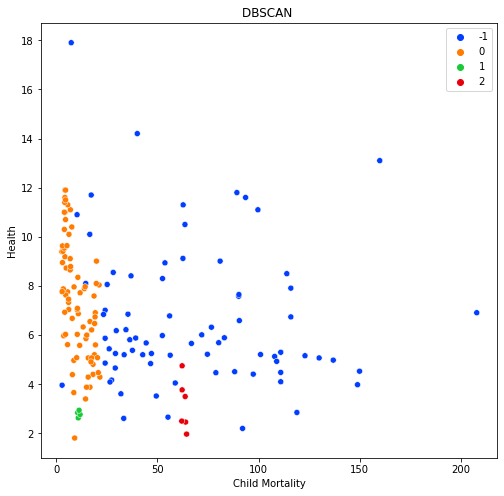

In [14]:
#plotting clusters

plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'child_mort', y = 'health', data = df,hue='clustdbscan', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN ')
plt.xlabel('Child Mortality')
plt.ylabel('Health')

In [15]:
#cluster-country
df.loc[df['country'] == 'Cameroon']


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustdbscan
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.91,57.3,5.11,1310,-1


In [16]:
df.loc[df['country'] == 'China']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustdbscan
34,China,15.7,26.3,5.07,22.6,9530,6.94,74.6,1.59,4560,0


In [17]:
df.loc[df['country'] == 'Germany']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustdbscan
58,Germany,4.2,42.3,11.6,37.1,40400,0.758,80.1,1.39,41800,0


In [18]:
df.loc[df['country'] == 'Australia']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustdbscan
7,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900,0


In [19]:
df.loc[df['country'] == 'United States']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clustdbscan
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400,-1
